# Neuron

Todo: Focus training points on steep region of the curve, to imporive accuracy in those parts

## Ausgangslage

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import random

In [14]:
x_inputs = np.logspace(0.01, 1, 100)   # Value from, Value to, Amount of total numbers
y_train_inputs = np.log10(x_inputs)

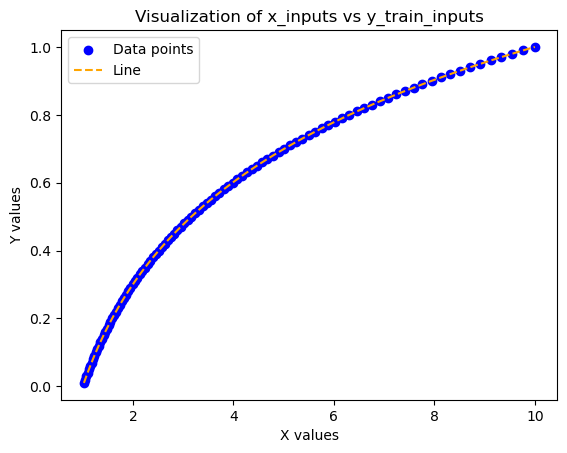

In [22]:
def visualize(x_inputs, y_train_inputs):
    # Scatter plot (points)
    plt.scatter(x_inputs, y_train_inputs, color="blue", label="Data points")

    # Line plot (connects points)
    plt.plot(x_inputs, y_train_inputs, color="orange", linestyle="--", label="Line")

    # Labels and title
    plt.xlabel("X values")
    plt.ylabel("Y values")
    plt.title("Visualization of x_inputs vs y_train_inputs")
    plt.legend()

    # Show the plot
    plt.show()

visualize(x_inputs, y_train_inputs)

## Bereitstellung des Modells

In [35]:
n_hidden = 5
weight_hidden = [random.uniform(-0.5, 0.5) for _ in range(n_hidden)]
bias_hidden   = [random.uniform(-0.5, 0.5) for _ in range(n_hidden)]
weight_out = [random.uniform(-0.5, 0.5) for _ in range(n_hidden)]
bias_out   = random.uniform(-0.5, 0.5)
epochs = 1000
print(f"Wir werden {epochs} Mal trainieren")
learning_rate = 0.05
print(f"wir trainieren mit einer learning rate von {learning_rate}")

Wir werden 1000 Mal trainieren
wir trainieren mit einer learning rate von 0.05


In [36]:
package = zip(x_inputs, y_train_inputs)
# print(list(package))

## Start Training

In [37]:
historical_loss = []

for epoch in range(epochs):
    
    if epoch % epochs/10 == 0:
        print("\n")
        print(f"Ich trainiere in Epoche {epoch+1}")
    package = zip(x_inputs, y_train_inputs)
    
    for x, y_true in package:

        hidden = [np.tanh(w*x + b) for w, b in zip(weight_hidden, bias_hidden)]
        y_pred = sum(w*h for w, h in zip(weight_out, hidden)) + bias_out

        diff = y_pred - y_true
        loss = diff ** 2

        historical_loss.append(loss)
        
        # output layer
        grad_w_out = [2.0 * diff * h for h in hidden]
        grad_b_out = 2.0 * diff
        
        # hidden layer
        # d_hidden = (1 - hidden**2) * weight2 * 2.0 * diff   # tanh' = 1 - tanh^2
        grad_w_hidden = []
        grad_b_hidden = []

        for i in range(n_hidden):
            d_hidden = (1 - hidden[i]**2) * weight_out[i] * 2.0 * diff
            grad_w_hidden.append(d_hidden * x)
            grad_b_hidden.append(d_hidden)


        # adjust hidden weight and bias:
        for i in range(n_hidden):
            weight_out[i] -= learning_rate * grad_w_out[i]
            bias_out -= learning_rate * grad_b_out

        # adjust output weight and bias:
        for i in range(n_hidden):
            weight_hidden[i] -= learning_rate * grad_w_hidden[i]
            bias_hidden[i]   -= learning_rate * grad_b_hidden[i]
        
        if epoch % epochs/10 == 0:
            print(f"Wir haben {x} und {y_true} als Trainings Daten")
            print(f"Ich sage y vorraus: {y_pred:.8f}")
            print(f"\033[31mIch lag um {diff:.8f} daneben\033[0m")
            for i in range(n_hidden):
                print(f"neues weight_hidden {i}: {weight_hidden[i]:.8f} und neues bias_hidden {i}: {bias_hidden[i]:.8f}")

    



Ich trainiere in Epoche 1
Wir haben 1.023292992280754 und 0.009999999999999986 als Trainings Daten
Ich sage y vorraus: 0.78240979
Ich lag um 0.77240979 daneben
neues weight_hidden 0: 0.03095627 und neues bias_hidden 0: 0.31112677
neues weight_hidden 1: 0.31595679 und neues bias_hidden 1: -0.41320924
neues weight_hidden 2: -0.25511222 und neues bias_hidden 2: -0.28420517
neues weight_hidden 3: -0.14823530 und neues bias_hidden 3: -0.07922589
neues weight_hidden 4: 0.49330697 und neues bias_hidden 4: -0.26778100
Wir haben 1.0471285480508996 und 0.02000000000000003 als Trainings Daten
Ich sage y vorraus: 0.29719744
Ich lag um 0.27719744 daneben
neues weight_hidden 0: 0.02356384 und neues bias_hidden 0: 0.30406706
neues weight_hidden 1: 0.32733078 und neues bias_hidden 1: -0.40234717
neues weight_hidden 2: -0.25324182 und neues bias_hidden 2: -0.28241895
neues weight_hidden 3: -0.13986688 und neues bias_hidden 3: -0.07123411
neues weight_hidden 4: 0.49844077 und neues bias_hidden 4: -0.2

# Usage

In [38]:
x_input = 3

hidden = [np.tanh(w*x_input + b) for w, b in zip(weight_hidden, bias_hidden)]
y_model_pred = sum(w*h for w,h in zip(weight_out, hidden)) + bias_out

print(f"x = {x_input}, y_pred = {y_model_pred:.8f}")

true = np.log10(x_input)
abs_err = abs(y_model_pred - true)
rel_err = abs_err / abs(true) * 100
print(f"Genaues Resultat Y = {true:.10f}, Voraussage Y = {y_model_pred:.8f}, Absoluter Fehler = {abs_err:.8f}, Relativer Fehler = {rel_err:.2f}%")

x = 3, y_pred = 0.47850312
Genaues Resultat Y = 0.4771212547, Voraussage Y = 0.47850312, Absoluter Fehler = 0.00138187, Relativer Fehler = 0.29%


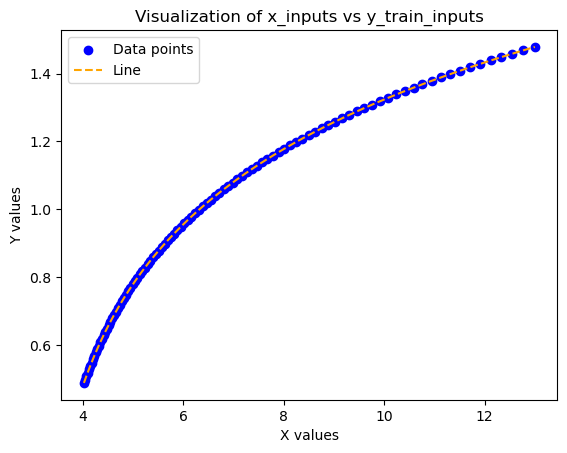

In [39]:
visualize(x_inputs + [x_input], y_train_inputs + [y_model_pred])

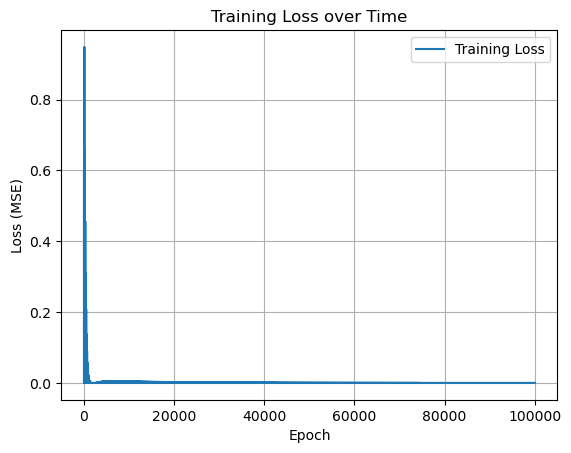

In [40]:
plt.plot(historical_loss, label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("Training Loss over Time")
plt.legend()
plt.grid(True)
plt.show()